# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquÃ­](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). DeberÃ¡s descargar -  al menos para comenzar - los aÃ±os 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los aÃ±os 2017, 2018 y 2019. Si deseas utilizar otros aÃ±os, ten en cuenta que deberÃ¡s hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.



#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con informaciÃ³n auxiliar (por fuera del dataset) o elementos del dataset que no estÃ©s utilizando (por ejemplo, si la tendencia es negativa, Â¿puede ser porque se migre a otras formas de pago?). --Listo Validada la hipÃ³tesis
1. Â¿La serie posee valores atÃ­picos? Si es asÃ­, interpreta, si es necesario con informaciÃ³n auxiliar. **Pista**: primer semestre 2019.

### PredicciÃ³n a Futuro

Debes implementar un modelo que prediga el trÃ¡fico en la autopista Illia para el Ãºltimo trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica. - Listo
1. EvalÃºa de forma apropiada tus resultados. Justifica la mÃ©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparÃ¡metros de tu modelo. 
1. Intenta responder la pregunta: Â¿QuÃ© informaciÃ³n estÃ¡ usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el trÃ¡fico en el aÃ±o 2020. Â¿CÃ³mo funciona?
1. Si lo deseas, puedes agregar informaciÃ³n de aÃ±os anteriores a 2017. Â¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. Â¿CÃ³mo incorporarÃ­as la informaciÃ³n sobre tipo de vehÃ­culo, forma de pago, sentido, dÃ­a de la semana, etc.? En lo que respecta a las predicciones, Â¿mejoran o empeoran?
1. Â¿QuÃ© ocurre si comparas las series de tiempo entre distintas estaciones de peajes?Â¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es asÃ­, Â¿hay informaciÃ³n auxiliar que te ayude a explicar lo que encuentras?
1. Â¿Hay algo que te gustarÃ­a investigar o probar?

### **Â¡TÃ³mate tiempo para investigar y leer mucho!**

### 1. PreparaciÃ³n del Dataset

### ExploraciÃ³n de datos

DedÃ­cale un buen tiempo a hacer un AnÃ¡lisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, Â¿CuÃ¡les son los dÃ­as y horarios de mayor trÃ¡fico? TambiÃ©n, estudia autocorrelaciones, resampleos, etc.

In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import missingno as msno
import seaborn as sns


sns.set_style("whitegrid")
sns.set_palette("mako")

In [685]:
##Importacion de los archivos
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

    Â¿Que tamaÃ±o tienen los arcvhios?
    Â¿Tienen valores faltantes?
    Â¿Que tipo de datos tienen los data sets? Â¿Tienen la misma estructura?
   

In [686]:
print(data_2017.info())
print('*********************************************')
print(data_2018.info())
print('*********************************************')
print(data_2019.info())
print('*********************************************')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB
None
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         137590

Al verificar que los datasets tienen las mismas columnas se pueden concatenar en uno solo para verificar los valores faltantes 

<AxesSubplot:>

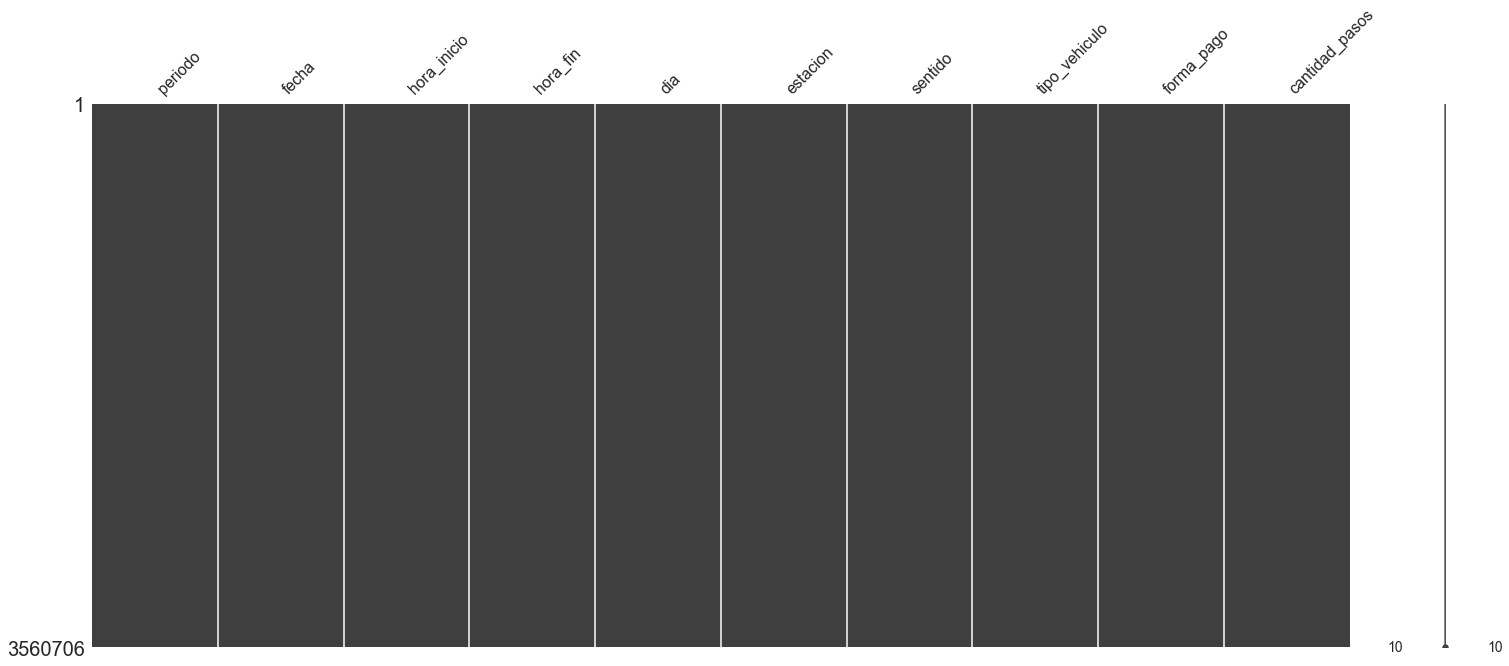

In [687]:
##concatenado de datasets para determinar si existen valores Na
df=pd.concat([data_2017,data_2018,data_2019])
##verificamos valores na
msno.matrix(df)

Hasta aquÃ­ pudimos ver que los datasets son iguales, pudimos verificar las cantidades de registros de cada uno, y que no presentan valores Na a simple vista, ya que tratandose de una serie temporal esto lo vamos a poder verificar a ciencia cierta con la funcion *interpolate*  
CÃ³mo indicaba la notebook de guÃ­a vamos a continuar con la verificaciÃ³n de algÃºnos de los valores del dataFrame

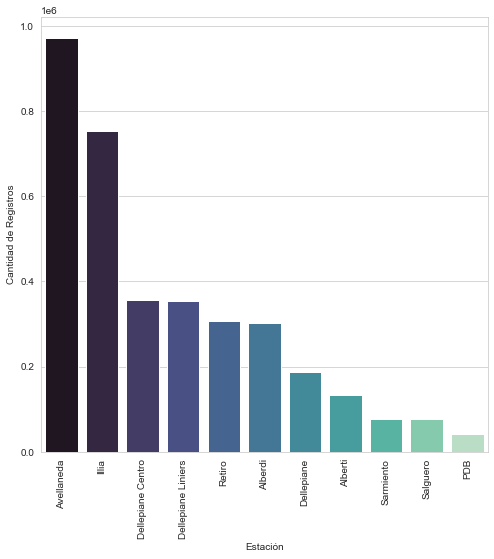

In [688]:
## Cantidades por estacion 
plt.figure(figsize=(8, 8))
sns.countplot(x=df['estacion'], data=df,  order = df['estacion'].value_counts().index,palette="mako")
plt.xticks(rotation=90)
plt.ylabel("Cantidad de Registros")
plt.xlabel("EstaciÃ³n")
plt.show()

Este grÃ¡fico nos va a servir para cuando ampliemos el estudio a las demÃ¡s estaciones de peaje

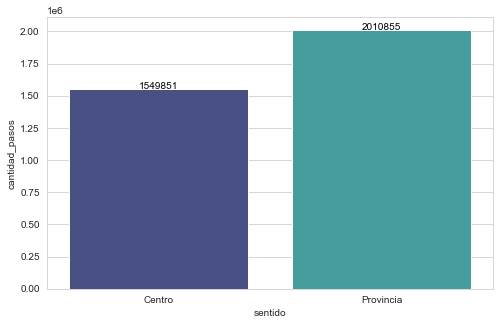

In [689]:
## Cantidad de registros por sentido

plt.figure(figsize=(8,5))
groupedvalues = df.groupby('sentido').count().reset_index()
g = sns.barplot(x = 'sentido', y = 'cantidad_pasos', data = groupedvalues,palette="mako")
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.cantidad_pasos - 16, round(row.cantidad_pasos, 2), color = 'black', ha = "center")
plt.show()

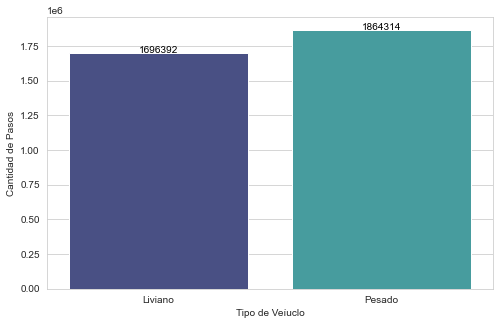

In [690]:
## Cantidades por Tipo de VehÃ­culo
plt.figure(figsize=(8,5))
groupedvalues = df.groupby('tipo_vehiculo').count().reset_index()
g = sns.barplot(x = 'tipo_vehiculo', y = 'cantidad_pasos', data = groupedvalues,palette="mako")
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.cantidad_pasos - 16, round(row.cantidad_pasos, 2), color = 'black', ha = "center")
plt.ylabel("Cantidad de Pasos")
plt.xlabel("Tipo de VeÃ­uclo")
plt.show()

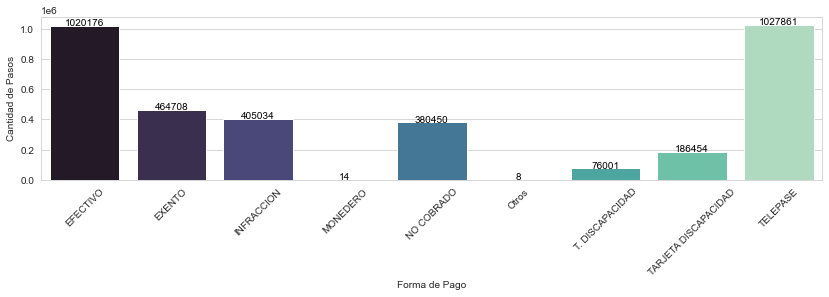

In [691]:
## Cantidades por forma de pago
plt.figure(figsize=(14,3))
groupedvalues = df.groupby('forma_pago').count().reset_index()
g = sns.barplot(x = 'forma_pago', y = 'cantidad_pasos', data = groupedvalues, palette="mako")
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name, row.cantidad_pasos - 16, round(row.cantidad_pasos, 2), color = 'black', ha = "center")
plt.ylabel("Cantidad de Pasos")
plt.xlabel("Forma de Pago")
plt.show()

Para la primera ejecuciÃ³n y entrenamiento de los modelos vamos a estar trabajando con la estaciÃ³n **Illia** y la forma de pago **Efectivo**


In [692]:
df_copia=df.copy()

In [693]:
df_copia=df.copy()

#Nos quedamos solamente con la estaciÃ³n Illia y la forma de pago Efectivo
mask = np.logical_and(df.estacion=='Illia', df.forma_pago == 'EFECTIVO')

##Filtramos los datasets 
df = df[mask]

#Quitamos las columnas que no vamos a utilizar
df.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

In [694]:
##Listamos las columnas del df
print(df.columns.to_list())

['fecha', 'hora_fin', 'dia', 'sentido', 'tipo_vehiculo', 'cantidad_pasos']


### ConclusiÃ³n luego de la primera ejecuciÃ³n
En la primera iteraciÃ³n del trabajo cuando identifique los componentes de la serie, vi que con los datos de la estaciÃ³n **Illia** y medio de Pago **efectivo**, la tendencia era negativa, y tome como hipÃ³tesis de que esto se da debido a que los conductores a medida que pasan los aÃ±os empiezan a optar por otras formas de pago, para corroborar esto, vamos a trabajar con un Dataframe que contenga la forma de pago **TELEPASE**, ya que es la segunda forma de pago mÃ¡s representativa y la que nos va a permitir verificar nuestra hipÃ³tesis, graficando las tendencias por cada una de las formas de pago

In [695]:
print("Shape  Estacion Illia -Efectivo")
print(df.shape)

Shape  Estacion Illia -Efectivo
(238869, 6)


In [696]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df['fecha2'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df.drop(columns=['fecha','hora_fin'], inplace = True)


In [697]:
#Corregimos el nombre de fecha2 a fecha
df.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [698]:
#Reordenamos el dataset por fecha
## Dataframe con Efectivo y Illia
df.sort_values('fecha', inplace = True)
df.reset_index(drop=True, inplace = True)

Text(0, 0.5, 'Cantidad de autos, por hora')

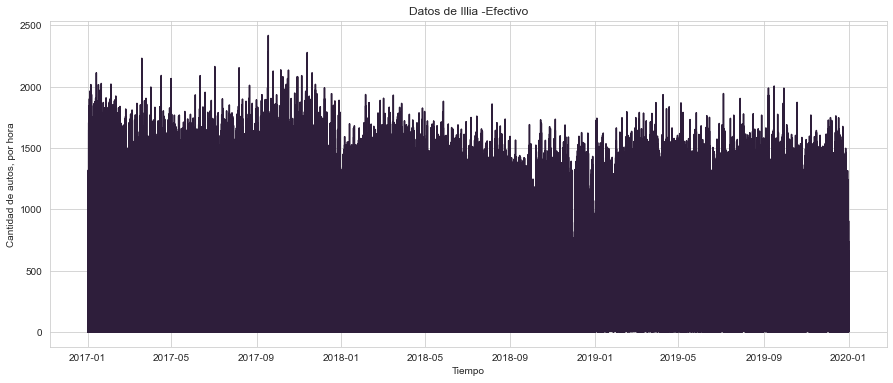

In [699]:
#Graficamos nuestros datos, tal como estÃ¡n
plt.figure(figsize = (15,6))
plt.plot(df.fecha, df.cantidad_pasos)
plt.xlabel('Tiempo')
plt.title("Datos de Illia -Efectivo")
plt.ylabel('Cantidad de autos, por hora')

In [700]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualizaciÃ³n mas amigable
diario = df.resample('D', on = 'fecha').sum()
##diario_prom=dataset.resample('D', on = 'fecha').mean()
diario.head()

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

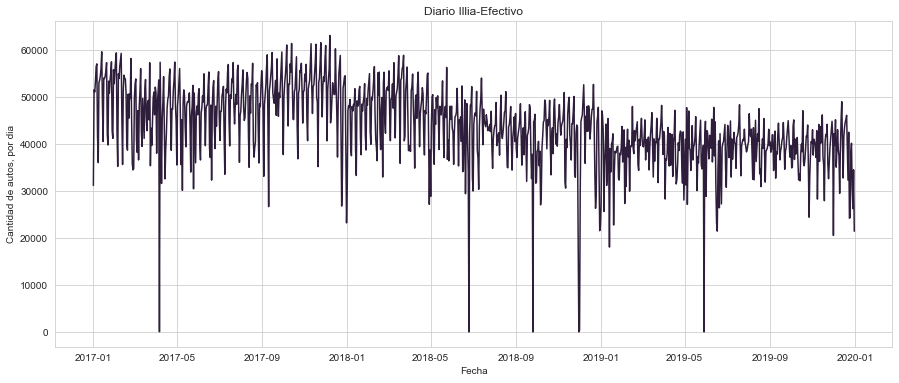

In [701]:
plt.figure(figsize = (15,6))
##plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Diario Illia-Efectivo")
plt.plot(diario.index,diario.cantidad_pasos)


Text(0, 0.5, 'Cantidad de Pasos Mensuales')

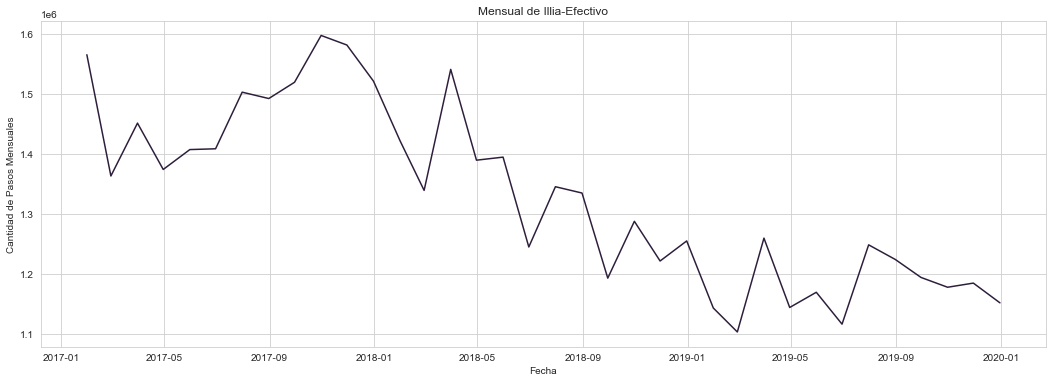

In [702]:
#Resampleamospor mes 
mensual = df.resample('M', on = 'fecha').sum()

plt.figure(figsize=(18,6))
plt.plot(mensual.index,mensual.cantidad_pasos)
plt.title("Mensual de Illia-Efectivo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Pasos Mensuales")


A simple vista con este resampleo por mes podemos ver que el anÃ¡lisis de los datos nos deberÃ­a arrojar una tendencia negativa 

## Valores Faltantes

In [703]:
## Funciones para eliminar outlayers 
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [704]:
diario['fecha']=diario.index

In [705]:
diario['check_fecha']=diario.fecha.diff()

In [706]:
## Verifico la diferencia de valoes entre la linea anterior 
print(diario.check_fecha.value_counts())

1 days    1094
Name: check_fecha, dtype: int64


In [707]:
print(diario.isna().sum())

cantidad_pasos    0
fecha             0
check_fecha       1
dtype: int64


In [708]:
## Eliminamos las columnas de checkeo de fecha
diario.drop(columns = ['fecha','check_fecha'], inplace = True)

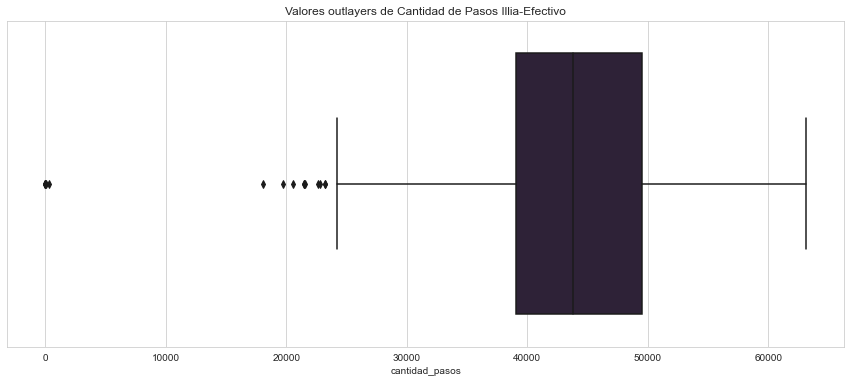

In [709]:
## Outlayers
plt.figure(figsize=(15,6))
sns.boxplot(data = diario, x='cantidad_pasos' )
plt.title("Valores outlayers de {} Illia-Efectivo".format("Cantidad de Pasos"))
plt.show()

In [710]:
##EliminaciÃ³n de valores outlayers 
diario=remove_outliers(diario,'cantidad_pasos')

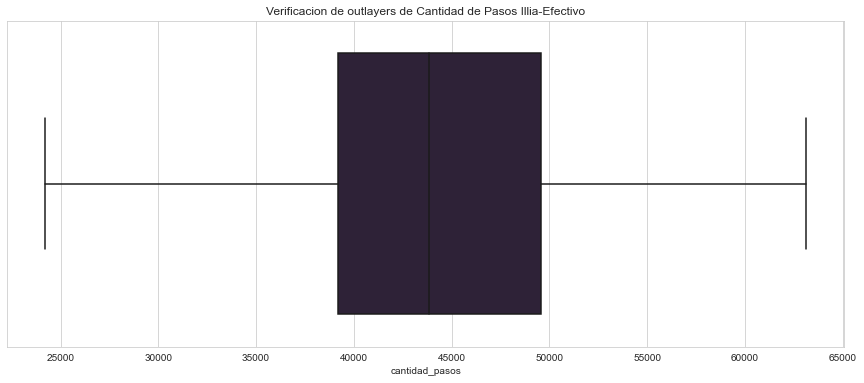

In [711]:
## Outlayers
plt.figure(figsize=(15,6))
sns.boxplot(data = diario, x='cantidad_pasos' )
plt.title("Verificacion de outlayers de {} Illia-Efectivo".format("Cantidad de Pasos"))
plt.show()

In [712]:
diario['fecha']=diario.index

In [713]:
## Luego de eliminar outlayers resampleamos nuevamente 
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualizaciÃ³n mas amigable
diario = diario.resample('D', on = 'fecha').sum()
##diario_prom=dataset.resample('D', on = 'fecha').mean()
diario.head()

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

In [714]:
diario.cantidad_pasos[diario.cantidad_pasos< 10] = np.nan

In [715]:
diario = diario.interpolate(method='time')

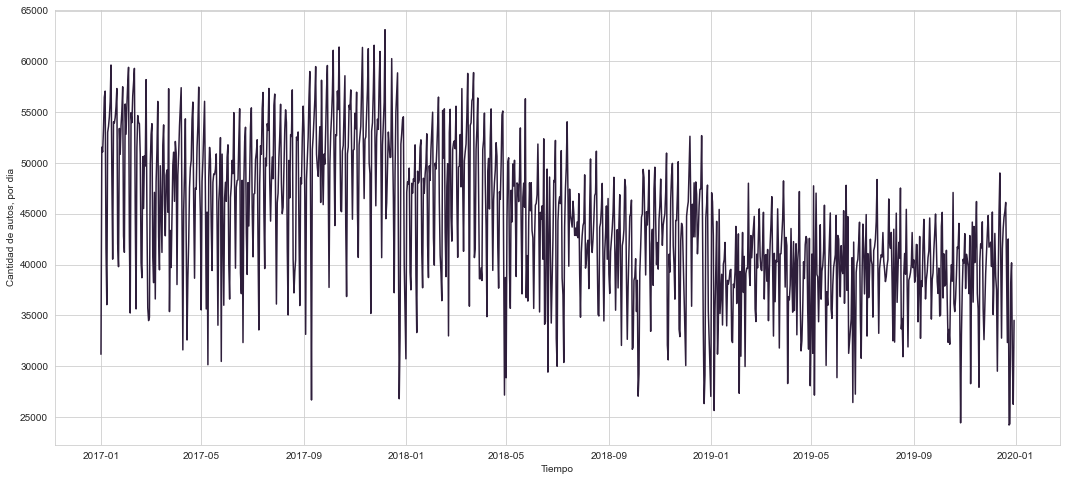

In [716]:
## Graficamos sin outlayers ni valores Na
plt.figure(figsize=(18,8))
plt.plot(diario.index,diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## Componentes de la Serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con informaciÃ³n auxiliar (por fuera del dataset) o elementos del dataset que no estÃ©s utilizando (por ejemplo, si la tendencia es negativa, Â¿puede ser porque se migre a otras formas de pago?).
1. Â¿La serie posee valores atÃ­picos? Si es asÃ­, interpreta, si es necesario con informaciÃ³n auxiliar. **Pista**: primer semestre 2019.

Vamos a probar de obtener la tendencia de la serie a travÃ¨s de la media movil.

In [717]:
## Tendencia 
ventana =100  ##TamaÃ±o de la ventana 
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()

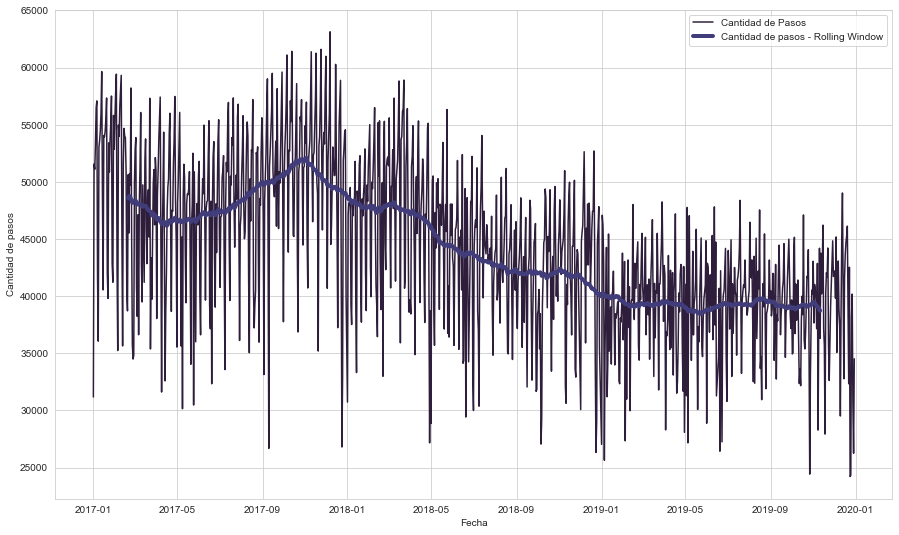

In [718]:
plt.figure(figsize = (15,9))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de Pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.title("")
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

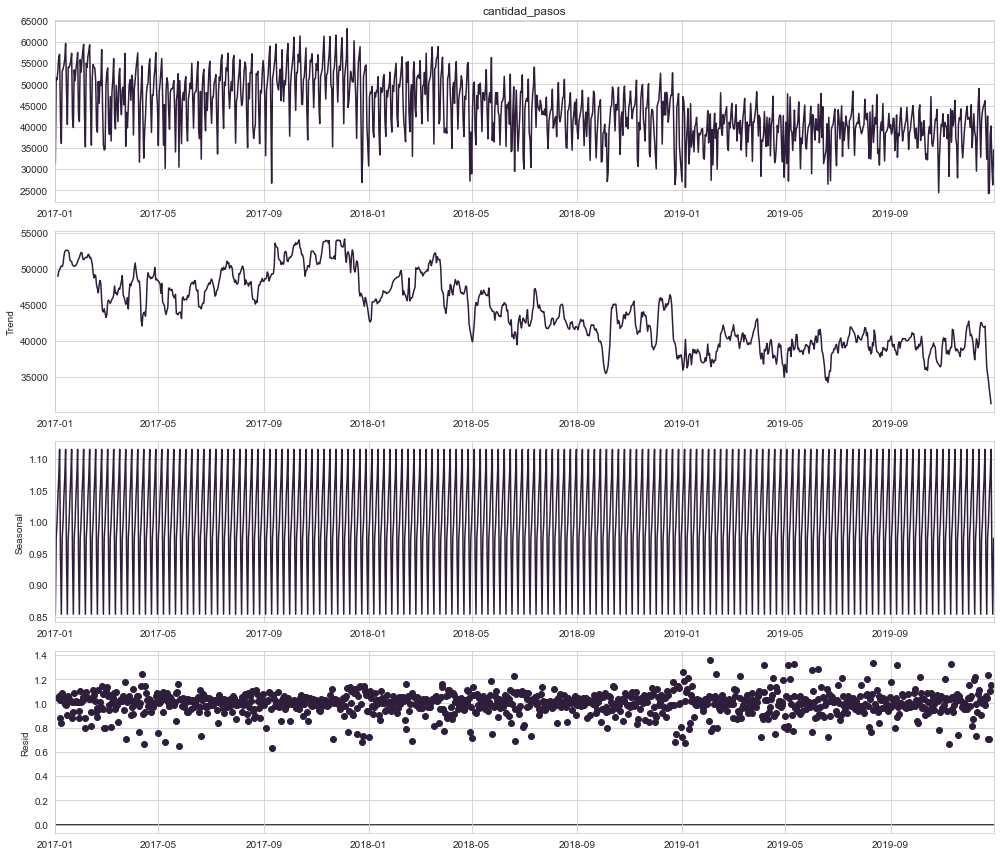

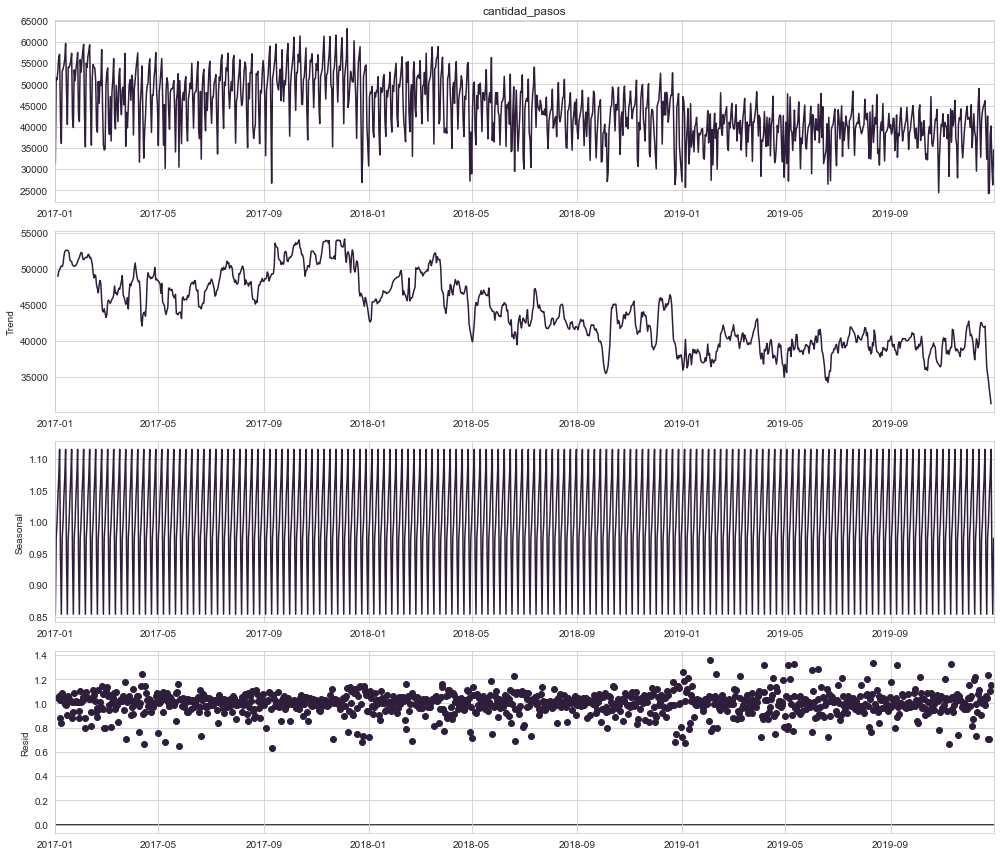

In [719]:
from statsmodels.tsa.seasonal import seasonal_decompose
diario.sort_index(inplace=True)
result = seasonal_decompose(diario.cantidad_pasos, model='multiplicative')
result.plot()

## Prueba con datos de Telepase
Ahora que obtuvimos los componentes del primer data frame, vamos a hacer los mismos pasos de transformaciÃ³n para el ocnjunto de datos de la forma de pago **TELEPASE**

In [720]:
## Trasformaciones para DF de Telepase
##Volvemos a ejecutar todas las transformaciones para validar la hipotesis del meido de pago TELEPASE

##Cargo el DF de nuevo 
df2=pd.concat([data_2017,data_2018,data_2019])
## Mask para dejar solo TELEPASE
mask2=  df2.forma_pago == 'TELEPASE'
## aplico el Filtro 
df_telep=df2[mask2]
#Quitamos las columnas que no vamos a utilizar
df_telep.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','sentido'], inplace = True)

C:\Users\Emma\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [721]:

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df_telep['fecha2'] = pd.to_datetime(df_telep.fecha) + pd.to_timedelta(df_telep.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df_telep.drop(columns=['fecha','hora_fin'], inplace = True)
df_telep.rename(columns = {'fecha2':'fecha'}, inplace = True) 


## Reodenamiento del Df por fecha
df_telep.sort_values('fecha', inplace = True)
df_telep.reset_index(drop=True, inplace = True)

<ipython-input-721-c9c09e409c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telep['fecha2'] = pd.to_datetime(df_telep.fecha) + pd.to_timedelta(df_telep.hora_fin, unit = 'h')
C:\Users\Emma\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-721-c9c09e409c64>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [722]:
df_telep.head()

dia tipo_vehiculo  cantidad_pasos      fecha
0  Domingo       Liviano             141 2017-01-01
1  Domingo        Pesado              10 2017-01-01
2  Domingo        Pesado               1 2017-01-01
3  Domingo        Pesado               2 2017-01-01
4  Domingo       Liviano             275 2017-01-01

In [723]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualizaciÃ³n mas amigable
diario_telep = df_telep.resample('D', on = 'fecha').sum()

In [724]:
## Validamos valores faltantes 
diario_telep['fecha']=diario_telep.index
diario_telep['check_fecha']=diario_telep.fecha.diff()
print(diario_telep.check_fecha.value_counts())
print(diario_telep.isna().sum())

1 days    1094
Name: check_fecha, dtype: int64
cantidad_pasos    0
fecha             0
check_fecha       1
dtype: int64


In [725]:
## Eliminamos las columnas de checkeo de fecha
diario_telep.drop(columns = ['fecha','check_fecha'], inplace = True)

Text(0.5, 1.0, 'Valores outlayers de Cantidad de Pasos Telepase')

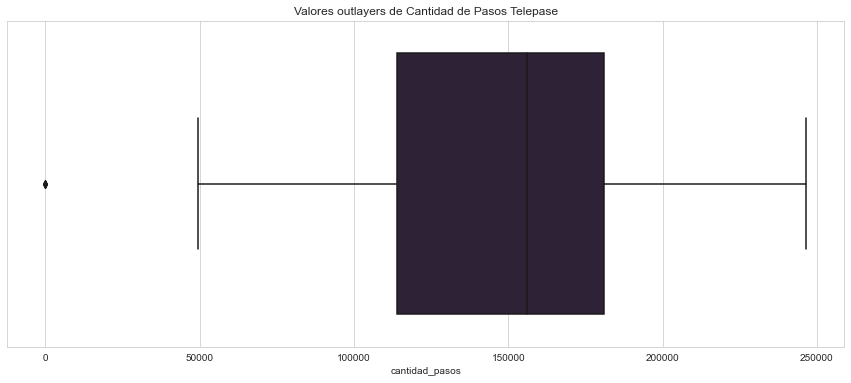

In [726]:
##Outlayers
plt.figure(figsize=(15,6))
sns.boxplot(data = diario_telep, x='cantidad_pasos' )
plt.title("Valores outlayers de {} Telepase".format("Cantidad de Pasos"))


In [727]:

##Eliminacion de Outlayers 
diario_telep=remove_outliers(diario_telep,'cantidad_pasos')

Text(0.5, 1.0, 'Valores outlayers de Cantidad de Pasos Telepase')

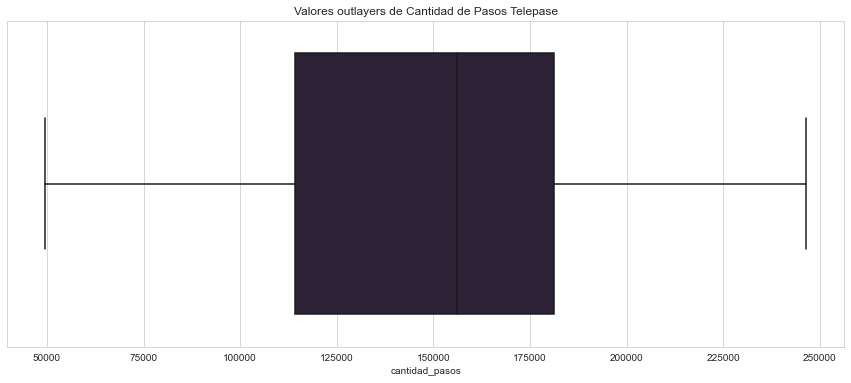

In [728]:
##Outlayers
plt.figure(figsize=(15,6))
sns.boxplot(data = diario_telep, x='cantidad_pasos' )
plt.title("Valores outlayers de {} Telepase".format("Cantidad de Pasos"))


In [729]:
diario_telep.cantidad_pasos[diario_telep.cantidad_pasos< 10] = np.nan

In [730]:
diario_telep = diario_telep.interpolate(method='time')

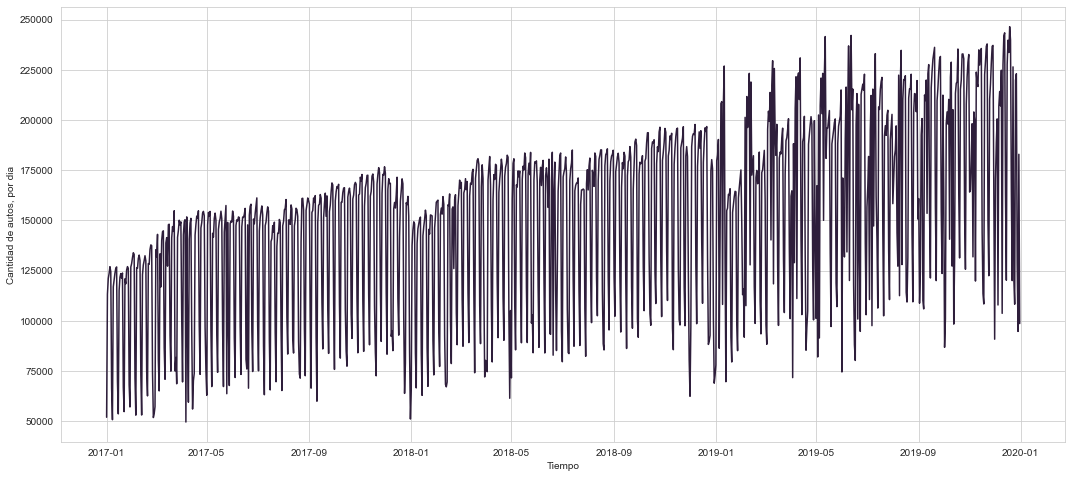

In [731]:
## Graficamos sin outlayers ni valores Na
plt.figure(figsize=(18,8))
plt.plot(diario_telep.index,diario_telep.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [732]:

##Componentes de la serie 
diario2_promedio_tendencia = diario_telep.cantidad_pasos.rolling(window=ventana, center = True).mean()

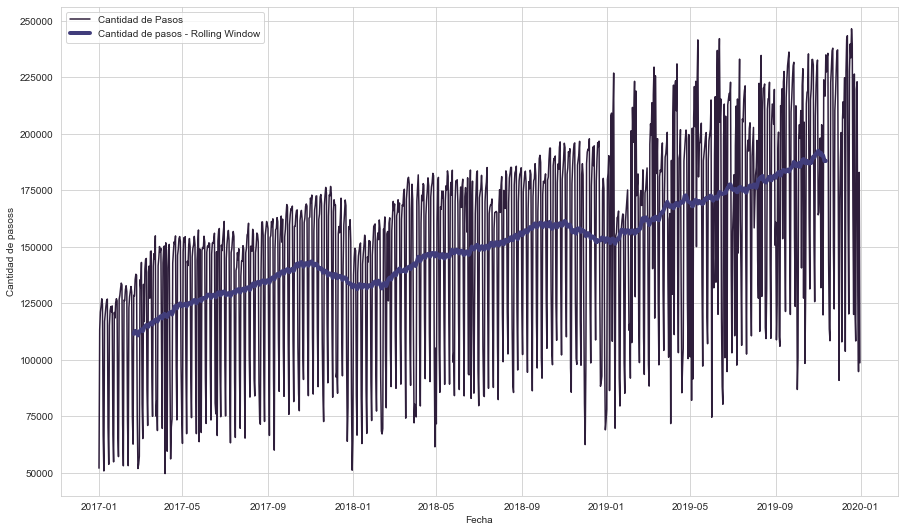

In [733]:
plt.figure(figsize = (15,9))
plt.plot(diario_telep.index, diario_telep.cantidad_pasos, label = 'Cantidad de Pasos')
plt.plot(diario2_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasoss')
plt.legend()
plt.show()

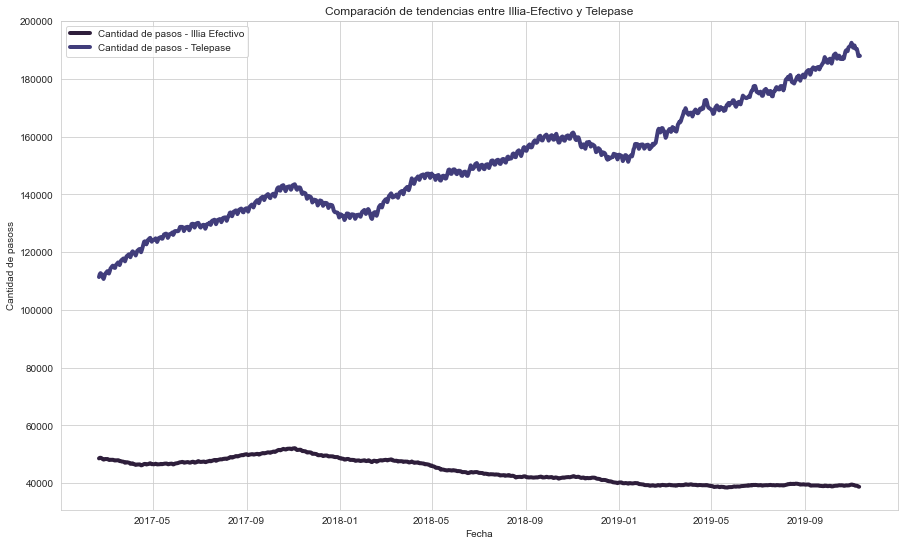

In [734]:
plt.figure(figsize = (15,9))
plt.title("ComparaciÃ³n de tendencias entre Illia-Efectivo y Telepase")
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Illia Efectivo')
plt.plot(diario2_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Telepase')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasoss')
plt.legend()
plt.show()

Al observar la descomposiciÃ³n de la serie y ver como van mutando a lo largo del timepo podemos apreciar que a partir de Enero del aÃ±o 2018 comienzan a tener una tendencia opuesta entre sÃ­, lo que nos da la nociÃ³n de que la suba incremental en la forma de pago "Telepase" se debe a que los conductores que antes de dicho periodo optaban por abonar en Efectivo comienzan a migrar a la nueva forma de pago. 
Algo a destacar de la descomposiciÃ³n de la serie de forma de pago "Telepase" es que a partir del primer mes del aÃ±o 2019 se aprecia una gran cantidad de Ruido que no estaba precente antes. PodrÃ­amos evaluar que esta sucediendo en esta franja temporal.

## Predecir 

Debes implementar un modelo que prediga el trÃ¡fico en la autopista Illia para el Ãºltimo trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica. - Listo
1. EvalÃºa de forma apropiada tus resultados. Justifica la mÃ©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparÃ¡metros de tu modelo. 
1. Intenta responder la pregunta: Â¿QuÃ© informaciÃ³n estÃ¡ usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el trÃ¡fico en el aÃ±o 2020. Â¿CÃ³mo funciona?
1. Si lo deseas, puedes agregar informaciÃ³n de aÃ±os anteriores a 2017. Â¿Mejoran los resultados?


Para predecir el trafico del Ãºltimo trimestre del 2019 no vamos a hacer ninguna tranformaciÃ³n ya que vamos a trabajar con el dataframe ya modificado y resampleado, al que ya le hemos quitado los valores outlayers y los valores Na

In [735]:
##Para armar la matriz de cantidades que nos va a permitir predecir los valores 
##futuros vamos a dejar en el dataframe solo la cantidad de pasos
serie=diario.cantidad_pasos

In [736]:
serie.shape

(1094,)

In [737]:
look_back = 365 # Vamos a usar un aÃ±o como ventana de tiempo para predecir el valor siguiente 

In [738]:
N = serie.shape[0]  ## Cantidad de Filas del DF original 
X = np.zeros((N - look_back - 1,look_back)) ## Armamos la matriz rellenandola con 0 ceros
y = np.zeros(N - look_back - 1)  ## Armamos la matriz target que contendra los valores de y 
print(X.shape, y.shape) ## Verifico Shapes 

(728, 365) (728,)


In [739]:
## Rellenamos la matriz con los valores del DF

for i in range(X.shape[0]):
    X[i,:] = serie.iloc[i:i+look_back]
    y[i] = serie.iloc[i+look_back]
print(X)

[[31183.         51568.         51093.         ... 54556.
  39969.         35352.        ]
 [51568.         51093.         53332.         ... 39969.
  35352.         30735.        ]
 [51093.         53332.         56486.         ... 35352.
  30735.         47130.        ]
 ...
 [45929.         47832.         35446.         ... 24220.
  24349.         38168.        ]
 [47832.         35446.         32643.33333333 ... 24349.
  38168.         40182.        ]
 [35446.         32643.33333333 29840.66666667 ... 38168.
  40182.         30681.        ]]


In [740]:
N_train = 902- look_back # Vamos a usar 3 aÃ±o y medio para entrenar 
N_test = 190        # Vamos a evaluar con 190 dÃ¬as 
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)
print(length_total)

(537, 365) (537,)
(190, 365) (190,)
1092


In [741]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Se provÃ³ un RandomForestRegressor pero se obtuvieron mejores resultados con un DecisionTreeRegressor

In [742]:
treeR=DecisionTreeRegressor(max_depth=10, random_state=42)
treeR.fit(X_train,y_train) 
##rf = RandomForestRegressor(n_estimators=450, random_state=42, n_jobs = -1).fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [743]:
y_predT = treeR.predict(X)
y_train_predT = treeR.predict(X_train)
y_test_predT = treeR.predict(X_test)

In [744]:
print(y_predT.shape)
print(y_train_predT.shape)
print(y_test_predT.shape)

(728,)
(537,)
(190,)


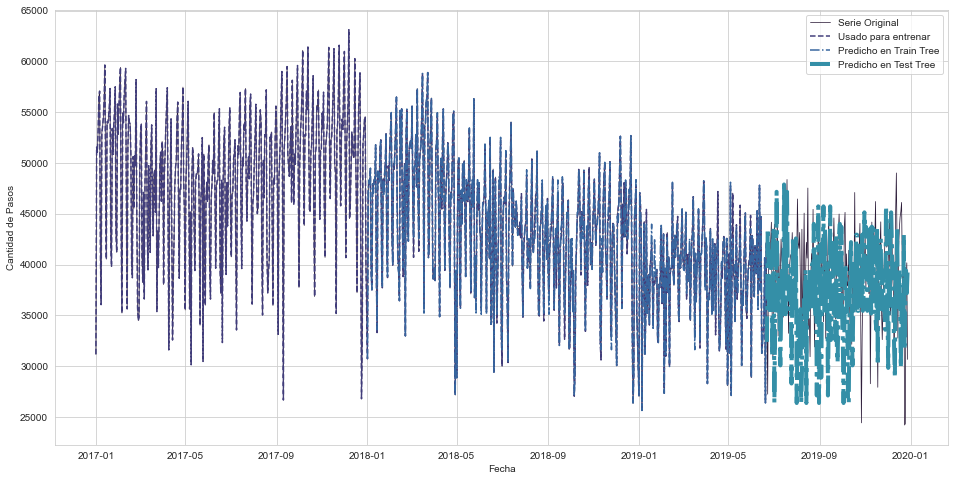

In [745]:
##Graficamos
plt.figure(figsize=(16,8))

plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(serie.index[look_back: look_back + N_train], y_train_predT,'-.',label = 'Predicho en Train Tree')
plt.plot(serie.index[N_train+look_back: length_total], y_test_predT,'-.', lw = 4, label = 'Predicho en Test Tree')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')

plt.show()

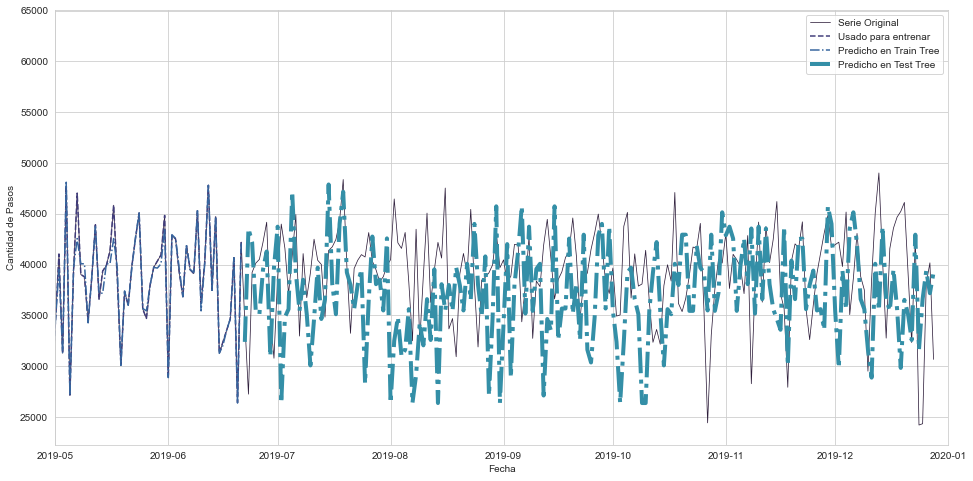

In [746]:
##Graficamos solo la predicciÃ²n
plt.figure(figsize=(16,8))

plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(serie.index[look_back: look_back + N_train], y_train_predT,'-.',label = 'Predicho en Train Tree')
plt.plot(serie.index[N_train+look_back: length_total], y_test_predT,'-.', lw = 4, label = 'Predicho en Test Tree')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.xlim([datetime.date(2019, 5, 1), datetime.date(2020, 1, 1)])
plt.show()

In [747]:
## Errores 
MSE = mean_squared_error(y_train, y_train_predT)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_predT)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 784.5739966034783
Error en Test: 6733.3932660244445


## Benchmark
Vamos a utilizar como modelo de Benchmark la definiciÃ³n de que la cantidad de pasos de autos sea igual a la de la fecha anterior.


In [748]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

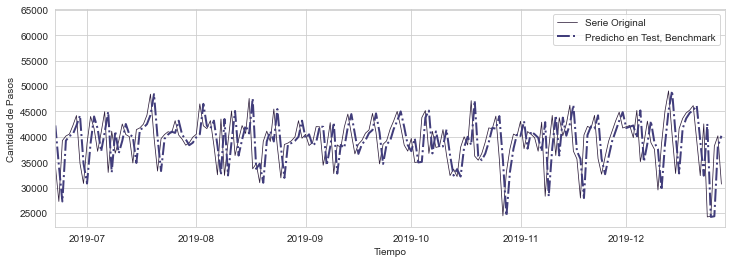

In [749]:
## Grafico el benchmark
plt.figure(figsize=(12,4))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(serie.index[N_train+look_back], serie.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.legend()
plt.show()

In [750]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
##MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
##print(np.sqrt(MSE))


## Errores en benchmark

MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 5511.275740888425


CÃ³mo el modelo de benchmark sigue siendo mejor que el modelo entrenado vamos a hacer optimizaciÃ³n de hiperparÃ¡metros

In [751]:
##Random Search
from sklearn.model_selection import GridSearchCV ## import de la libreria

param_grid = {
              "max_depth": np.random.randint(2,35,10),  
              "criterion":["squared_error", "mse", "friedman_mse", "absolute_error", "mae", "poisson"]
}
 
grid_cv_trr = GridSearchCV(treeR, param_grid, cv = 5, n_jobs=-1, scoring='neg_root_mean_squared_error')
print(grid_cv_trr.fit(X_train, y_train))

print("Mejores parametros: "+str(grid_cv_trr.best_params_)+'\n')
print("Mejor Score: "+str(grid_cv_trr.best_score_)+'\n')

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': array([ 8, 31, 20,  5, 31,  2,  9, 20, 30, 34])},
             scoring='neg_root_mean_squared_error')
Mejores parametros: {'criterion': 'mse', 'max_depth': 2}

Mejor Score: -5536.267887455264



RaÃ­z del error cuadrÃ¡tico medio en Train: 4615.331861137504
RaÃ­z del error cuadrÃ¡tico medio en Test: 4644.6901470985695


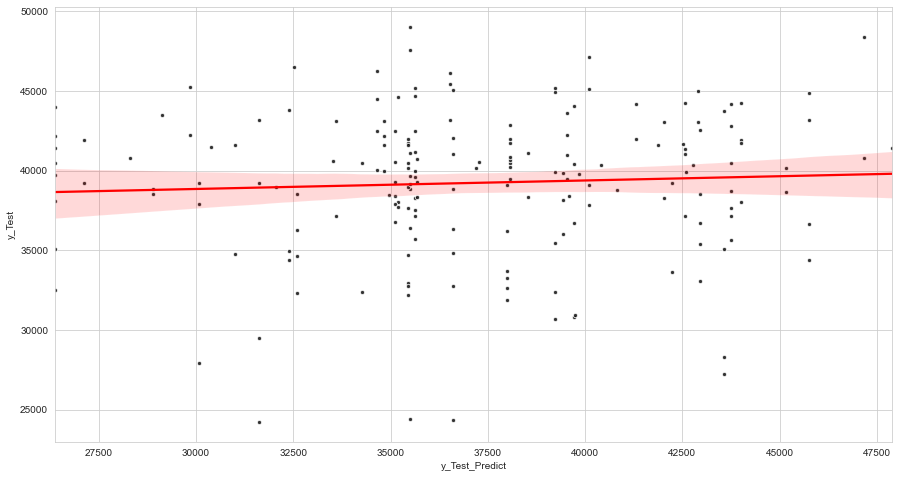

In [752]:
y_train_rs_trr =grid_cv_trr.predict(X_train)
y_test_rs_trr = grid_cv_trr.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_rs_trr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_rs_trr))
print(f'RaÃ­z del error cuadrÃ¡tico medio en Train: {rmse_train}')
print(f'RaÃ­z del error cuadrÃ¡tico medio en Test: {rmse_test}')

#Grafico
plt.figure(figsize=(15,8))
sns.regplot(y=y_test ,x=y_test_predT,scatter_kws={"color": "black","s":18,"edgecolors":"w"}, line_kws={"color": "r"})
plt.ylabel('y_Test')
plt.xlabel('y_Test_Predict')
plt.show()

Con esta optimizaciÃ³n de hiperparÃ¡metros logramos mejorar el modelo de benchmark disminuyendo el RMSE

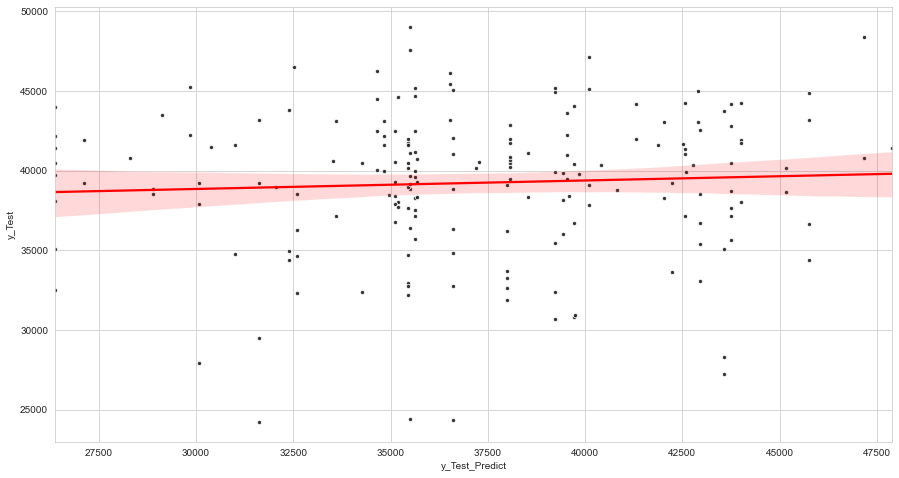

In [753]:
#Grafico
plt.figure(figsize=(15,8))
sns.regplot(y=y_test ,x=y_test_predT,scatter_kws={"color": "black","s":18,"edgecolors":"w"}, line_kws={"color": "r"})
plt.ylabel('y_Test')
plt.xlabel('y_Test_Predict')
plt.show()

## PredicciÃ³n

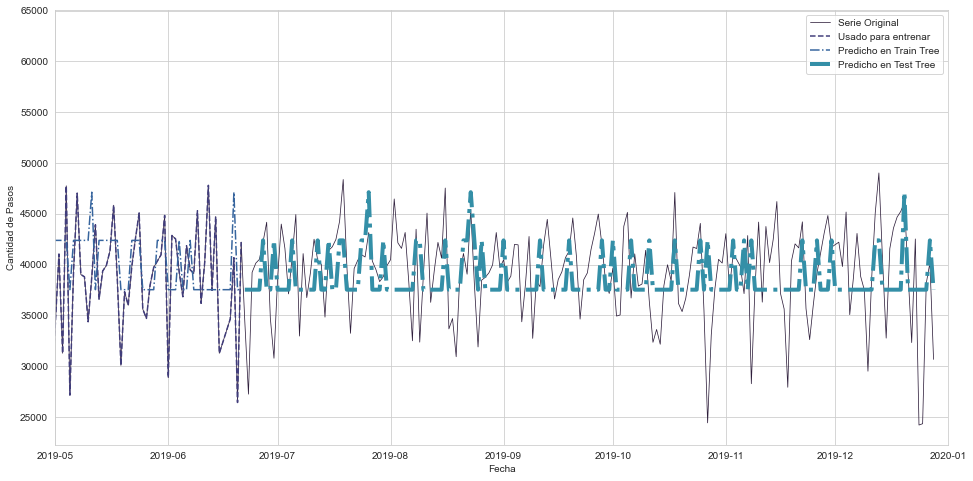

In [754]:
##Graficamos solo la predicciÃ²n
plt.figure(figsize=(16,8))

plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')

plt.plot(serie.index[look_back: look_back + N_train], y_train_rs_trr,'-.',label = 'Predicho en Train Tree')
plt.plot(serie.index[N_train+look_back: length_total], y_test_rs_trr,'-.', lw = 4, label = 'Predicho en Test Tree')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Pasos')
plt.xlim([datetime.date(2019, 5, 1), datetime.date(2020, 1, 1)])
plt.show()

In [755]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_rs_trr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_rs_trr))
print(f'RaÃ­z del error cuadrÃ¡tico medio en Train: {rmse_train}')
print(f'RaÃ­z del error cuadrÃ¡tico medio en Test: {rmse_test}')


RaÃ­z del error cuadrÃ¡tico medio en Train: 4615.331861137504
RaÃ­z del error cuadrÃ¡tico medio en Test: 4644.6901470985695


Podemos observar cÃ³mo la optimizaciÃ³n de hiperparÃ¡metros es muy efectiva y mejora el modelo a tal punto de mejorar el score respecto del model de benchmark

## Prophet

In [756]:
from prophet import Prophet
ph = Prophet()

In [757]:
df_prophet = pd.DataFrame()

mask= diario.index<'2019-10-01'
diario_fil= diario[mask]


In [758]:
df_prophet['ds'] = diario_fil.index
df_prophet['y'] = diario_fil.cantidad_pasos.values

In [759]:
ph.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [760]:
# Vamos a predecir 90 dÃ­as
future = ph.make_future_dataframe(periods=180)
future.tail()

ds
1178 2020-03-24
1179 2020-03-25
1180 2020-03-26
1181 2020-03-27
1182 2020-03-28

In [761]:
forecast = ph.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1178 2020-03-24  40334.661208  34502.306068  45771.947545
1179 2020-03-25  42129.848830  36358.901944  48074.446054
1180 2020-03-26  43402.002110  38377.655456  48718.913241
1181 2020-03-27  45321.108218  39367.397369  50872.848042
1182 2020-03-28  37309.689301  31161.305734  43024.831787

<Figure size 864x1800 with 0 Axes>

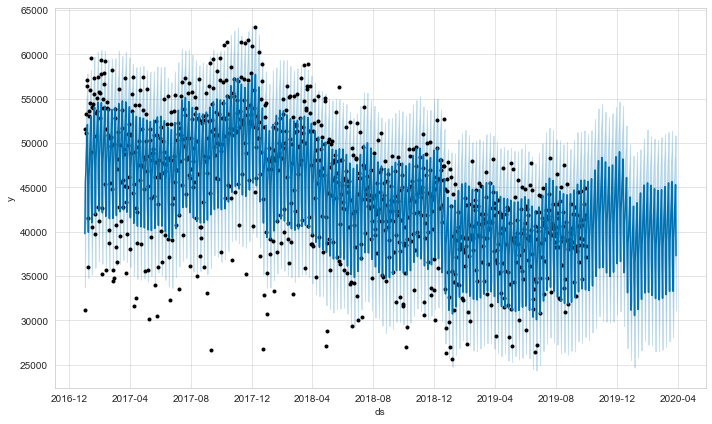

In [762]:
plt.figure(figsize=(12,25))
fig1 = ph.plot(forecast)

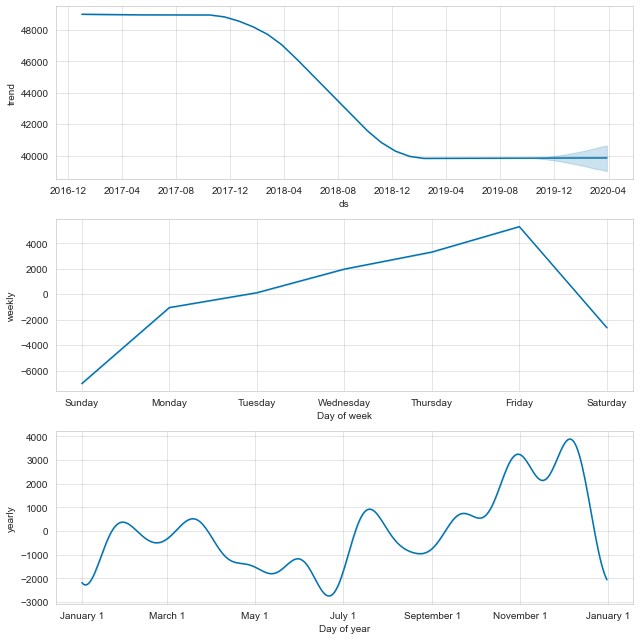

In [763]:
fig2 = ph.plot_components(forecast)

In [764]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(ph, initial='600 days', period='180 days', horizon = '90 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2019-01-03 00:00:00 and 2019-07-02 00:00:00


In [765]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0  9 days  2.499131e+07  4999.130666  4190.366000  0.114696  0.080848   
1 10 days  3.086518e+07  5555.643735  4879.839833  0.132942  0.120075   
2 11 days  2.762257e+07  5255.718250  4545.823529  0.118459  0.084173   
3 12 days  2.418076e+07  4917.393132  4202.704661  0.109771  0.081857   
4 13 days  1.881134e+07  4337.204582  3585.676677  0.095543  0.069784   

      smape  coverage  
0  0.114167  0.666667  
1  0.133869  0.611111  
2  0.122188  0.666667  
3  0.111965  0.722222  
4  0.096191  0.777778

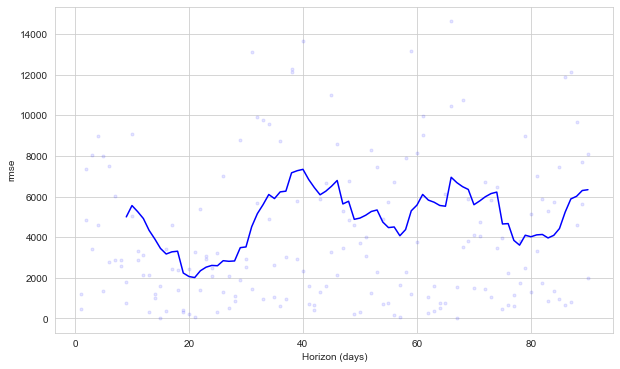

In [766]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')


Vamos a probar de incorporar la informaciÃ²n de los dias feriados de argentina, ya que esas fechas clave el modelo las puede interpretar  y mejorar el aumento en el trÃ¡fico vehicular

In [767]:
#Feriados

years = [] 
for i in range(2017,2022,1):
    years.append(i)

import holidays
Feriados = holidays.Argentina(years=years)
Feriados = pd.DataFrame.from_dict(Feriados,orient='index').reset_index().rename(columns={'index':'ds',0:'holiday'})
navidad = Feriados.loc[Feriados['holiday'].str.contains('Navidad')].copy()
navidad['lower_window'] = -1
navidad['upper_window'] = 0
Feriados = Feriados.loc[-Feriados['holiday'].str.contains('Navidad')]

Feriados.head()

ds                                            holiday
0  2017-01-01                         AÃ±o Nuevo [New Year's Day]
1  2017-02-27                   DÃ­a de Carnaval [Carnival's Day]
2  2017-02-28                   DÃ­a de Carnaval [Carnival's Day]
3  2017-03-24  DÃ­a Nacional de la Memoria por la Verdad y la ...
4  2017-04-13  Semana Santa (Jueves Santo)  [Holy day (Holy T...

In [768]:
##Instanciamos el phrophet para probar la informaciÃ³n de feriados
ph2=Prophet(weekly_seasonality=True, daily_seasonality=True, holidays=Feriados
    ,interval_width = 0.95, changepoint_prior_scale=0.5)
##Fiteamos el modelo
ph2.fit(df_prophet)
# Vamos a predecir 365 dÃ­as
future = ph.make_future_dataframe(periods=365)
future.tail()

ds
1363 2020-09-25
1364 2020-09-26
1365 2020-09-27
1366 2020-09-28
1367 2020-09-29

<Figure size 864x1800 with 0 Axes>

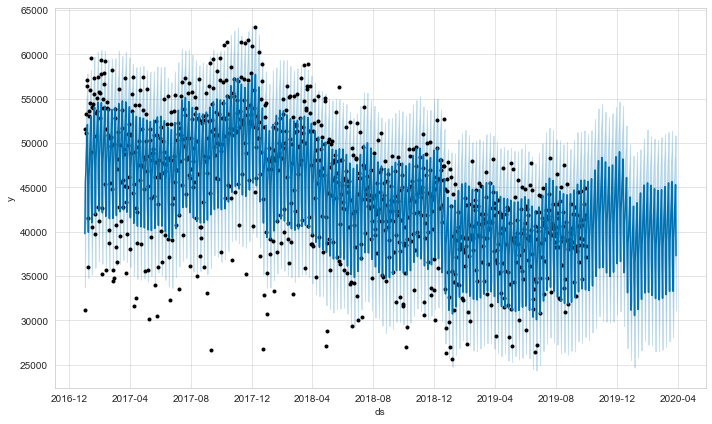

In [769]:
plt.figure(figsize=(12,25))
fig1 = ph2.plot(forecast)

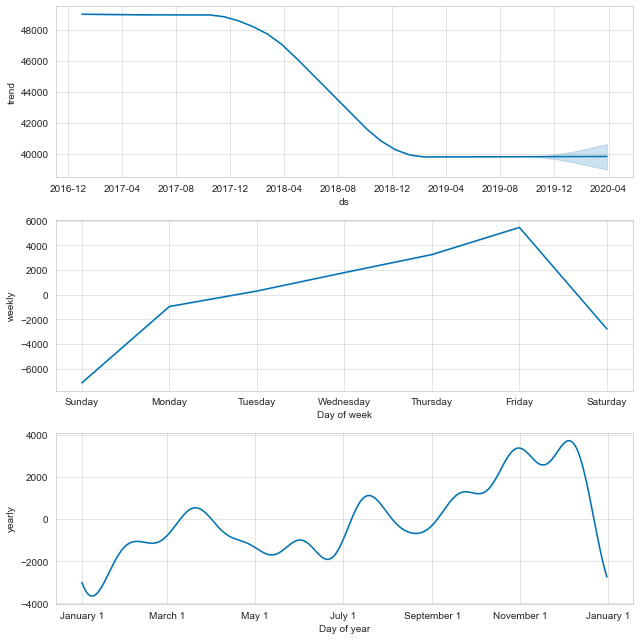

In [770]:
fig2 = ph2.plot_components(forecast)

In [771]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(ph2, initial='720 days', period='180 days', horizon = '90 days')


INFO:prophet:Making 2 forecasts with cutoffs between 2019-01-03 00:00:00 and 2019-07-02 00:00:00


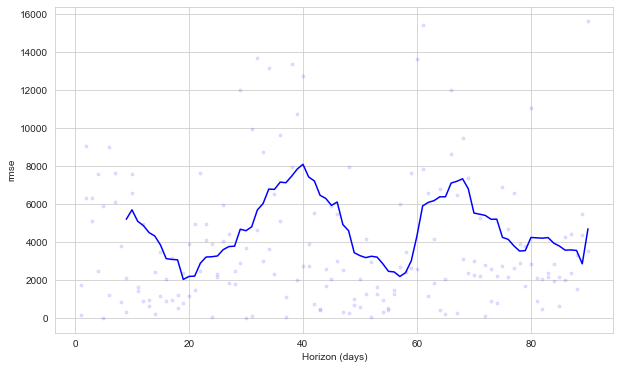

In [772]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')


Vamos a optimizar hiperparametros del primer modelo que entrenamos para ver si mejora la predicciÃ³n

## InformaciÃ³n Historica

Vamos a agregar la informaciÃ³n anterior al 2017 para ver si predice mejor el modelo

In [773]:
data_2016 = pd.read_csv('Datasets/flujo-vehicular-2016.csv', sep =',')
data_2015 = pd.read_csv('Datasets/flujo-vehicular-2015.csv', sep =',')
data_2014 = pd.read_csv('Datasets/flujo-vehicular-2014.csv', sep =',')
data_2013 = pd.read_csv('Datasets/flujo-vehicular-2013.csv', sep =',')
data_2012 = pd.read_csv('Datasets/flujo-vehicular-2012.csv', sep =',')
data_2011 = pd.read_csv('Datasets/flujo-vehicular-2011.csv', sep =',')
data_2010 = pd.read_csv('Datasets/flujo-vehicular-2010.csv', sep =',')
data_2009 = pd.read_csv('Datasets/flujo-vehicular-2009.csv', sep =',')
data_2008 = pd.read_csv('Datasets/flujo-vehicular-2008.csv', sep =';')

In [774]:
columnas=pd.DataFrame()
n=2008
for i in (data_2009,data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,data_2016):
    
    print("Dataset: {} ".format(n))
    print(i.columns.to_list())
    n=n+1

Dataset: 2008 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2009 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2010 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2011 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2012 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2013 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2014 
['periodo', 'fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']
Dataset: 2015 
['periodo', 'fecha', 'hora_inicio', 'hora_fin', 'dia', 'estacion', 'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']


Podemos Ver que no todos los archivos tienen el mismo formato por lo que vamos a tener que hacer modificaciones para que se puedan mergear en uno solo.

In [775]:
data_2008.rename(columns = {'FECHA':'fecha' , 'PERIODO':'periodo','DIA':'dia',
                            'HORA':'hora','HORA_FIN':'hora_fin','ESTACION':'estacion',
                            'TIPO_VEHICULO':'tipo_vehiculo','FORMA_PAGO':'forma_pago',
                            'CANTIDAD_PASOS':'cantidad_pasos'}, inplace = True) 

data_2016.rename(columns={'hora_inicio':'hora'},inplace=True)

In [776]:
data_2008.columns.to_list()

['periodo',
 'fecha',
 'dia',
 'hora',
 'hora_fin',
 'estacion',
 'tipo_vehiculo',
 'forma_pago',
 'cantidad_pasos']

In [777]:
## Seleccionamos solo las columnas necesarias
data_2008.drop(columns = ['periodo','forma_pago','hora_fin'], inplace = True)
data_2009.drop(columns = ['periodo','forma_pago' ], inplace = True)
data_2010.drop(columns = ['periodo','forma_pago' ], inplace = True)
data_2011.drop(columns = ['periodo','forma_pago'], inplace = True)
data_2012.drop(columns = ['periodo','forma_pago' ], inplace = True)
data_2013.drop(columns = ['periodo','forma_pago' ], inplace = True)
data_2014.drop(columns = ['periodo','forma_pago'], inplace = True)
data_2015.drop(columns = ['periodo','forma_pago'], inplace = True)
data_2016.drop(columns = ['periodo','forma_pago','hora_fin','sentido'], inplace = True)

In [778]:
data_2008 = data_2008[['fecha','hora', 'dia','tipo_vehiculo', 'cantidad_pasos']]

In [779]:
columnas=pd.DataFrame()
n=2008
for i in (data_2009,data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,data_2016):
    
    ##print("Dataset: {} ".format(n))
    print(i.columns.to_list())
    n=n+1

['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']


In [780]:
historico=pd.concat([data_2009,data_2010,data_2011,data_2012,data_2013,data_2014,data_2015,data_2016])
ult_3_anios=pd.concat([data_2017,data_2018,data_2019])

In [781]:
print(historico.columns.to_list())
print(ult_3_anios.columns.to_list())

['fecha', 'hora', 'dia', 'estacion', 'tipo_vehiculo', 'cantidad_pasos']
['periodo', 'fecha', 'hora_inicio', 'hora_fin', 'dia', 'estacion', 'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos']


In [782]:
ult_3_anios.drop(columns = ['periodo','forma_pago','sentido','hora_fin'], inplace = True)
ult_3_anios.rename(columns={'hora_inicio':'hora'},inplace=True)

In [783]:
df_total=pd.concat([historico,ult_3_anios])

In [784]:
df_total.tail()

fecha  hora     dia   estacion tipo_vehiculo  cantidad_pasos
812148  2019-12-31  23.0  Martes   Salguero       Liviano             7.0
812149  2019-12-31  23.0  Martes   Salguero       Liviano             4.0
812150  2019-12-31  23.0  Martes   Salguero        Pesado             1.0
812151  2019-12-31  23.0  Martes  Sarmiento       Liviano             7.0
812152  2019-12-31  23.0  Martes  Sarmiento       Liviano             7.0

Con toda la informaciÃ³n unida vamos a ejecutar el prophet nuevamente y ver si el rmse disminuye al agregar mÃ¡s informaciÃ³n histÃ³rica

In [785]:
df_total['fecha2'] = pd.to_datetime(df_total.fecha)+ pd.to_timedelta(df_total.hora)
df_total.drop(columns=['fecha','hora'], inplace = True)
df_total.rename(columns={'fecha2':'fecha'},inplace=True)
#Reordenamos el dataset por fecha
## Dataframe con Efectivo y Illia
df_total.sort_values('fecha', inplace = True)
df_total.reset_index(drop=True, inplace = True)

In [786]:
df_total.head()

dia    estacion tipo_vehiculo  cantidad_pasos      fecha
0  Jueves  Avellaneda       Liviano             6.0 2009-01-01
1  Jueves  Avellaneda       Liviano             3.0 2009-01-01
2  Jueves  Avellaneda        Pesado             2.0 2009-01-01
3  Jueves  Avellaneda        Pesado             1.0 2009-01-01
4  Jueves  Avellaneda        Pesado             2.0 2009-01-01

Text(0, 0.5, 'Cantidad de autos, por hora')

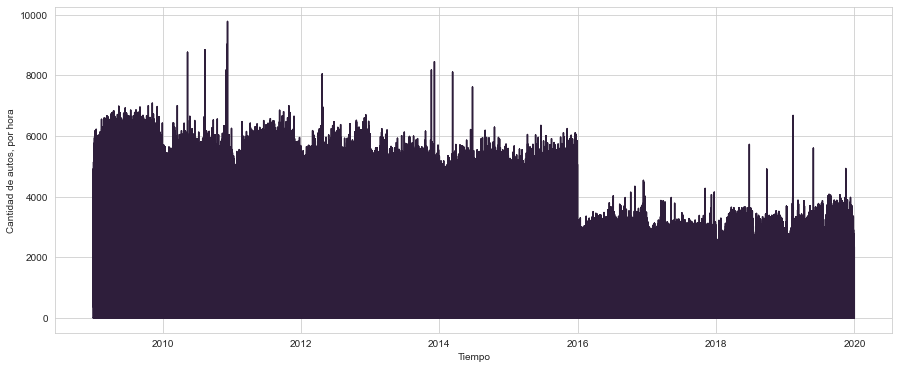

In [787]:
#Graficamos nuestros datos, tal como estÃ¡n
plt.figure(figsize = (15,6))
plt.plot(df_total.fecha, df_total.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')

In [788]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualizaciÃ³n mas amigable
diario_total_int = df_total.resample('D', on = 'fecha').sum()
##diario_prom=dataset.resample('D', on = 'fecha').mean()
diario_total_int.head()

cantidad_pasos
fecha                     
2009-01-01        136181.0
2009-01-02        209601.0
2009-01-03        170370.0
2009-01-04        161495.0
2009-01-05        283903.0

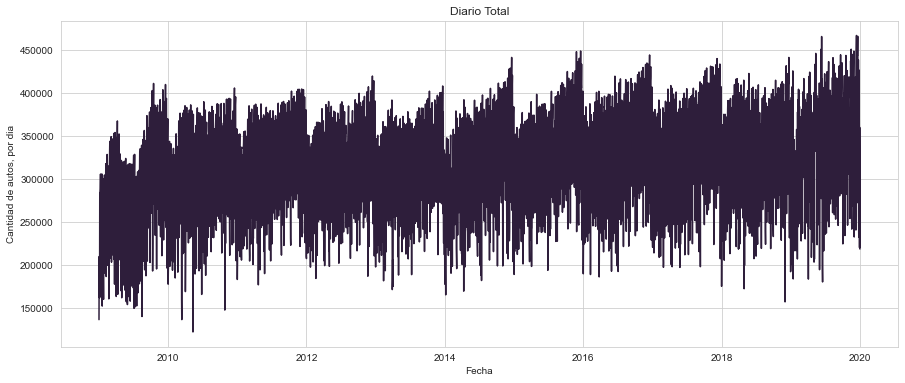

In [789]:
plt.figure(figsize = (15,6))
##plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Diario Total")
##plt.xlim([datetime.date(2007, 1, 1), datetime.date(2010, 2, 1)])
plt.plot(diario_total_int.index,diario_total_int.cantidad_pasos)

Podemos ver que los datos del 2008 son significativamente menor a toda la serie, por lo que no los vamos a utilizar como input del modelo ya que los consideramos valores outlayers

In [790]:
diario_total_int['fecha2']=diario_total_int.index
mascara_mayor_2008 = diario_total_int.fecha2>datetime.datetime(year=2009, month=1, day=1)
##Filtramos los datasets 
diario_total_int = diario_total_int[mascara_mayor_2008]

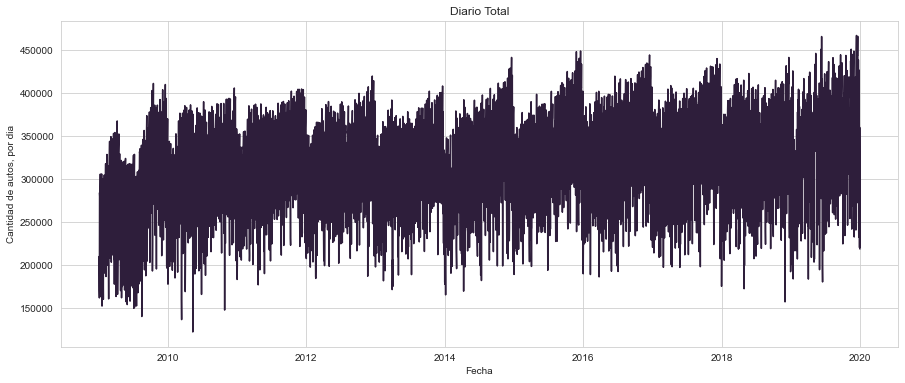

In [791]:
plt.figure(figsize = (15,6))
##plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de autos, por dia')
plt.title("Diario Total")
##plt.xlim([datetime.date(2007, 1, 1), datetime.date(2010, 2, 1)])
plt.plot(diario_total_int.index,diario_total_int.cantidad_pasos)

In [792]:
##EliminaciÃ³n de valores outlayers 
diario_total_int=remove_outliers(diario_total_int,'cantidad_pasos')

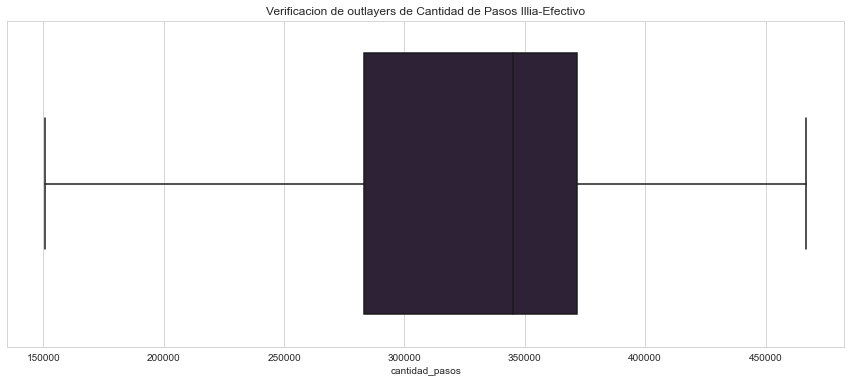

In [793]:
## Outlayers
plt.figure(figsize=(15,6))
sns.boxplot(data = diario_total_int, x='cantidad_pasos' )
plt.title("Verificacion de outlayers de {} Illia-Efectivo".format("Cantidad de Pasos"))
plt.show()

In [794]:
diario_total_int = diario_total_int.interpolate(method='time')

In [795]:
ph_total = Prophet()
total_ph=pd.DataFrame()
total_ph['ds'] = diario_total_int.index
total_ph['y'] = diario_total_int.cantidad_pasos.values

In [796]:
ph_total.fit(total_ph)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [797]:
# Vamos a predecir 90 dÃ­as
future_total = ph_total.make_future_dataframe(periods=180)
future_total.tail()

ds
4186 2020-06-24
4187 2020-06-25
4188 2020-06-26
4189 2020-06-27
4190 2020-06-28

In [798]:
forecast_total = ph_total.predict(future)
forecast_total[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
1363 2020-09-25  406278.370797  361322.642188  453944.947876
1364 2020-09-26  319632.702044  275221.068812  365511.580766
1365 2020-09-27  277690.200271  231558.191726  326222.651083
1366 2020-09-28  366985.928186  318770.538114  411848.044592
1367 2020-09-29  381072.060881  331909.711127  432444.825051

<Figure size 864x1800 with 0 Axes>

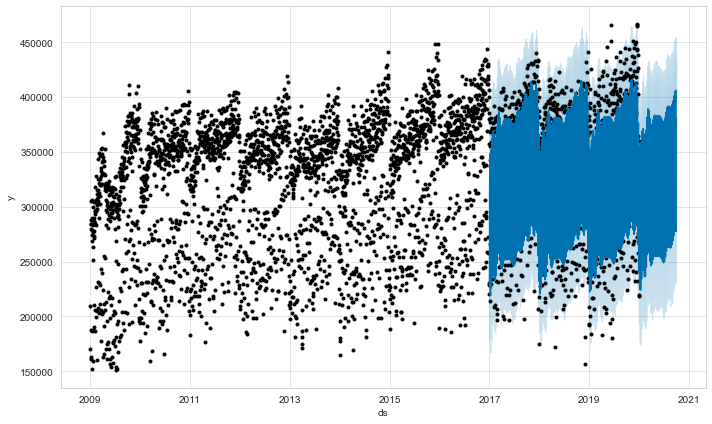

In [799]:
plt.figure(figsize=(12,25))
fig1 = ph_total.plot(forecast_total)

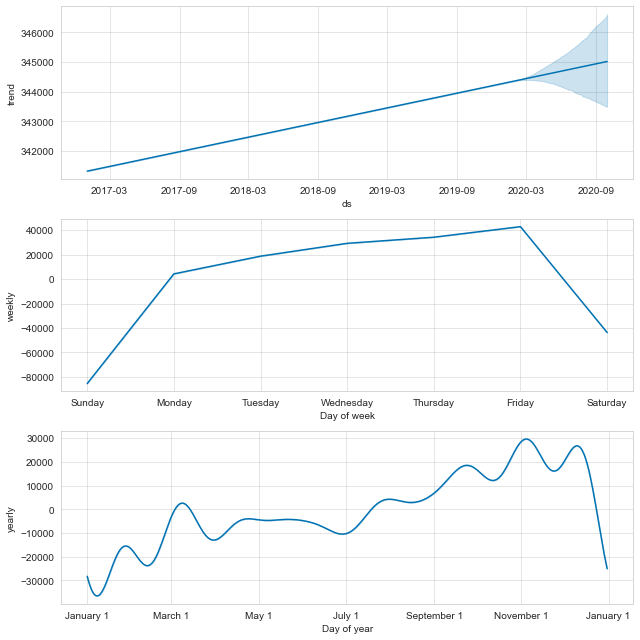

In [800]:
fig_total = ph_total.plot_components(forecast_total)

In [801]:
from prophet.diagnostics import cross_validation
df_cv2 = cross_validation(ph_total, initial='1825 days', period='365 days', horizon = '180 days')


INFO:prophet:Making 6 forecasts with cutoffs between 2014-07-05 00:00:00 and 2019-07-04 00:00:00


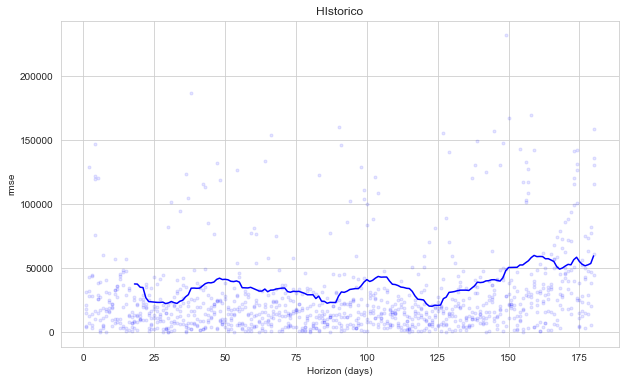

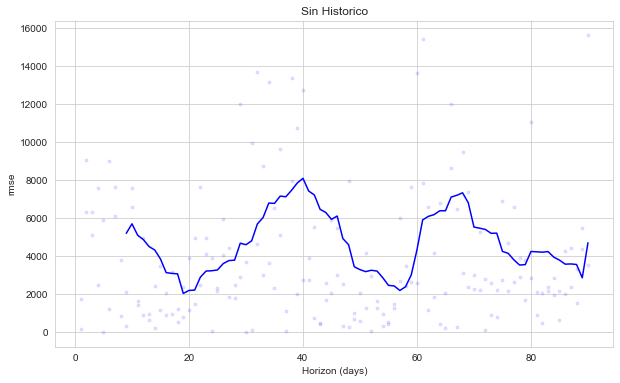

In [802]:
from prophet.plot import plot_cross_validation_metric
fig_total = plot_cross_validation_metric(df_cv2, metric='rmse')
plt.title("HIstorico")
plt.show(fig_total)

fig= plot_cross_validation_metric(df_cv, metric='rmse')
plt.title("Sin Historico")
plt.show(fig_total)



# fig = plot_cross_validation_metric(df_cv, metric='rmse')


En esta comparaciÃ³n de los rmse de los dos entrenamientos podemos ver la disminusiÃ³n del error al incorporar datos histÃ³ricos, lo cual nos da la nociÃ³n de que la predicciÃ³n va a ser mucho mÃ¡s acertiva para el primer trimestre del 2020

In [803]:
forecast_total.head()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2017-01-01  341320.472016  178861.598324  273799.881769  341320.472016   
1 2017-01-02  341323.176607  267827.814170  363333.693449  341323.176607   
2 2017-01-03  341325.881198  279879.033583  373291.668802  341325.881198   
3 2017-01-04  341328.585789  290534.114590  384431.850919  341328.585789   
4 2017-01-05  341331.290380  296377.609821  388252.064711  341331.290380   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  341320.472016  -113622.836599        -113622.836599        -113622.836599   
1  341323.176607   -26232.343920         -26232.343920         -26232.343920   
2  341325.881198   -13658.113076         -13658.113076         -13658.113076   
3  341328.585789    -4709.323669          -4709.323669          -4709.323669   
4  341331.290380     -900.150412           -900.150412           -900.150412   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0 -85387.309726 -85387.309726 -85387.309726 -28235.526873 -28235.526873   
1   4218.473065   4218.473065   4218.473065 -30450.816985 -30450.816985   
2  18682.189608  18682.189608  18682.189608 -32340.302684 -32340.302684   
3  29177.253576  29177.253576  29177.253576 -33886.577245 -33886.577245   
4  34178.810952  34178.810952  34178.810952 -35078.961364 -35078.961364   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -28235.526873                   0.0                         0.0   
1 -30450.816985                   0.0                         0.0   
2 -32340.302684                   0.0                         0.0   
3 -33886.577245                   0.0                         0.0   
4 -35078.961364                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0  227697.635417  
1                         0.0  315090.832687  
2                         0.0  327667.768122  
3                         0.0  336619.262120  
4                         0.0  340431.139967

(18261.0, 18414.0)

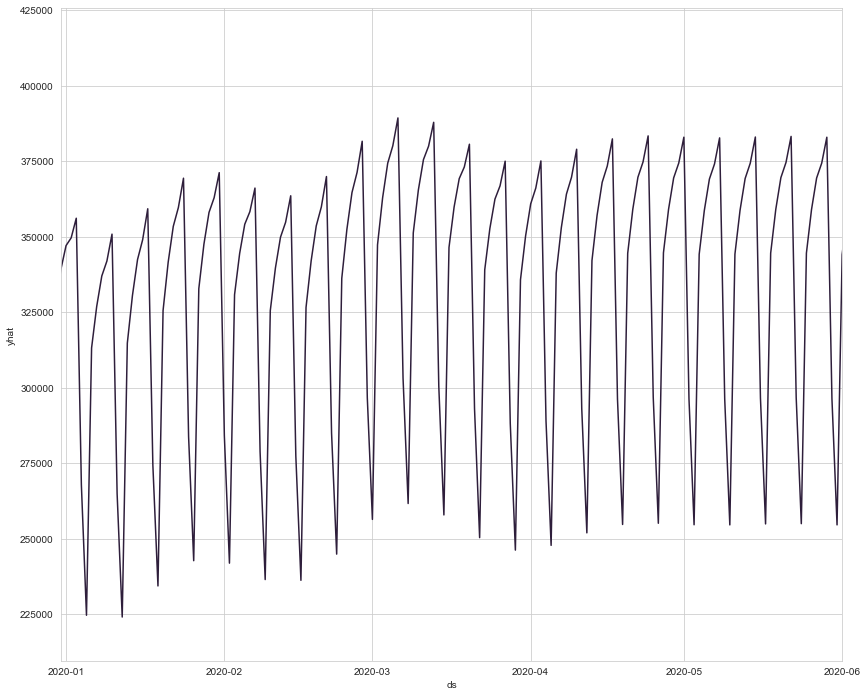

In [804]:
sns.lineplot(x=forecast_total.ds,y=forecast_total.yhat)
plt.xlim([datetime.date(2019, 12, 31), datetime.date(2020, 6, 1)])

## InvestigaciÃ³n

1. Â¿CÃ³mo incorporarÃ­as la informaciÃ³n sobre tipo de vehÃ­culo, forma de pago, sentido, dÃ­a de la semana, etc.? En lo que respecta a las predicciones, Â¿mejoran o empeoran?
2. Â¿QuÃ© ocurre si comparas las series de tiempo entre distintas estaciones de peajes?Â¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es asÃ­, Â¿hay informaciÃ³n auxiliar que te ayude a explicar lo que encuentras?
3. Â¿Hay algo que te gustarÃ­a investigar o probar?

### 1. InformaciÃ³n de Variables categÃ³ricas 

Para incorporar la informaciÃ³n sobre variables categÃ³ricas como las mencionadas en este punto, se pueden utilizar los regressores de prophet, para ello se deberÃ­a: 
1. Hacer Label enconding de cada variable a utilizar 
2. Usar el metodo add_regressor() de la libreria Prophet
3. Hacer una nueva prediccÃ­on

### 2. ComparaciÃ³n de series entre estaciones de peaje


In [805]:
df_total

dia    estacion tipo_vehiculo  cantidad_pasos  \
0         Jueves  Avellaneda       Liviano             6.0   
1         Jueves  Avellaneda       Liviano             3.0   
2         Jueves  Avellaneda        Pesado             2.0   
3         Jueves  Avellaneda        Pesado             1.0   
4         Jueves  Avellaneda        Pesado             2.0   
...          ...         ...           ...             ...   
10005120  Martes  Dellepiane       Liviano             1.0   
10005121  Martes  Dellepiane       Liviano            22.0   
10005122  Martes   Sarmiento       Liviano             7.0   
10005123     NaN         NaN           NaN             NaN   
10005124     NaN         NaN           NaN      10788269.0   

                                 fecha  
0        2009-01-01 00:00:00.000000000  
1        2009-01-01 00:00:00.000000000  
2        2009-01-01 00:00:00.000000000  
3        2009-01-01 00:00:00.000000000  
4        2009-01-01 00:00:00.000000000  
...                                ...  
10005120 2019-12-31 00:00:00.000000023  
10005121 2019-12-31 00:00:00.000000023  
10005122 2019-12-31 00:00:00.000000023  
10005123                           NaT  
10005124                           NaT  

[10005125 rows x 5 columns]

In [806]:
estaciones=['Avellaneda', 'Illia', 'Dellepiane Liniers', 'Alberdi', 'Retiro',
       'Sarmiento', 'Dellepiane Centro', 'Salguero', 'Dellepiane',
       'Alberti', 'PDB']

In [807]:
len(estaciones)

11

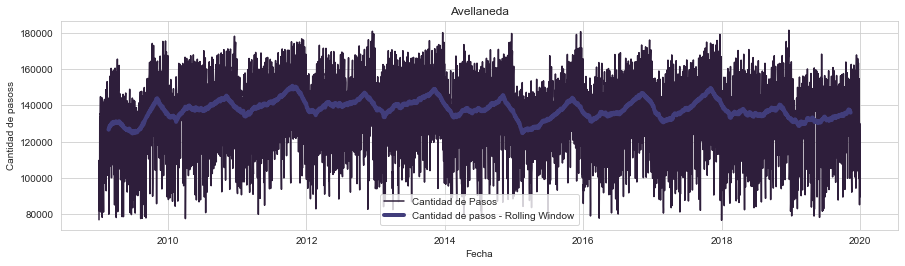

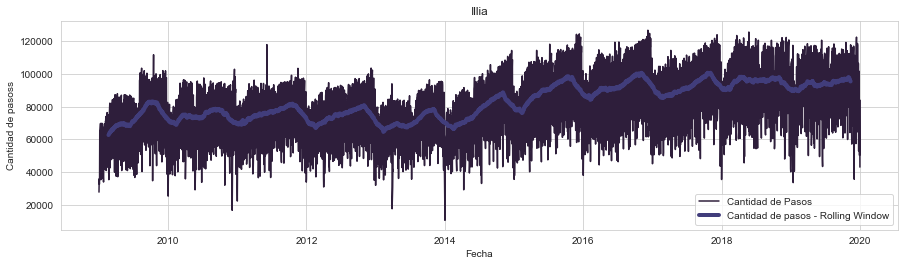

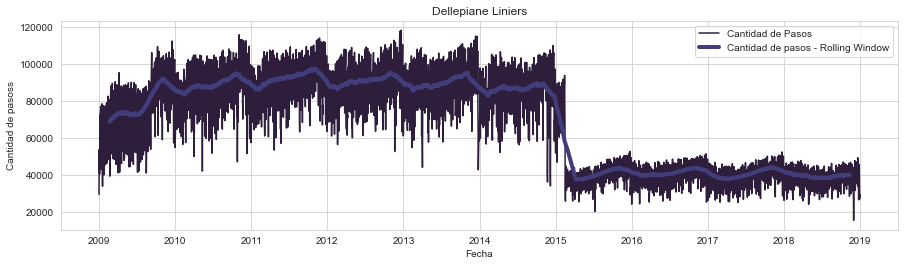

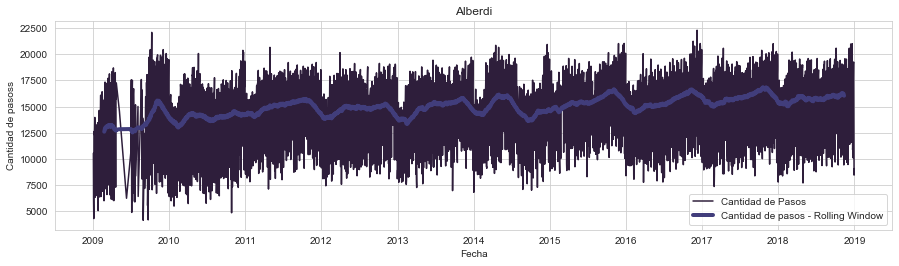

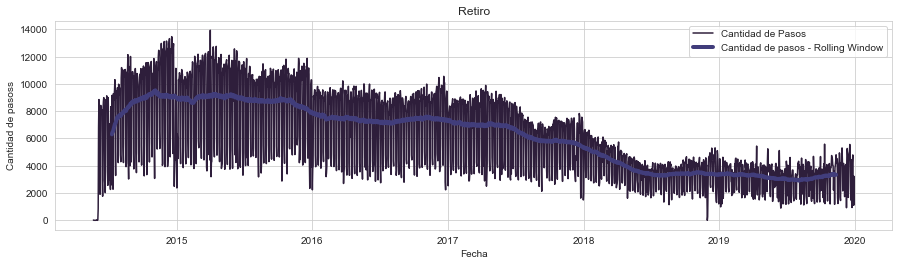

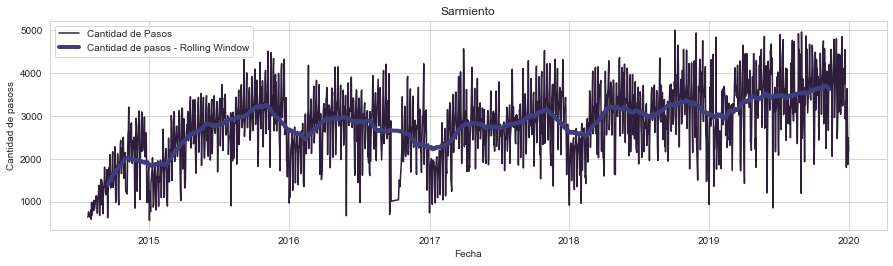

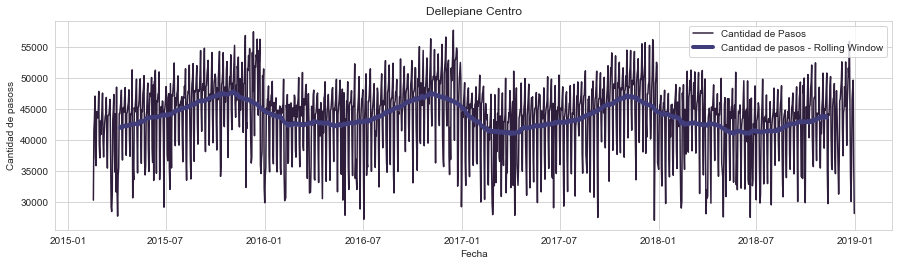

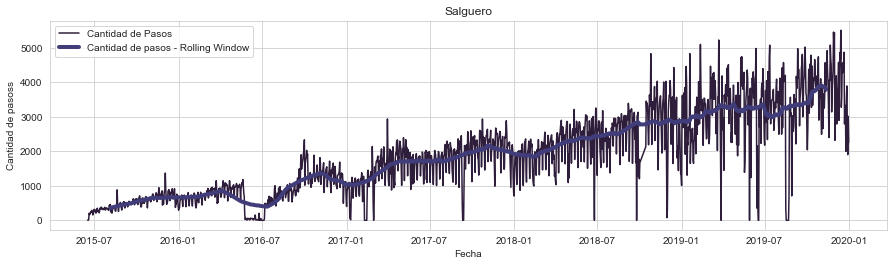

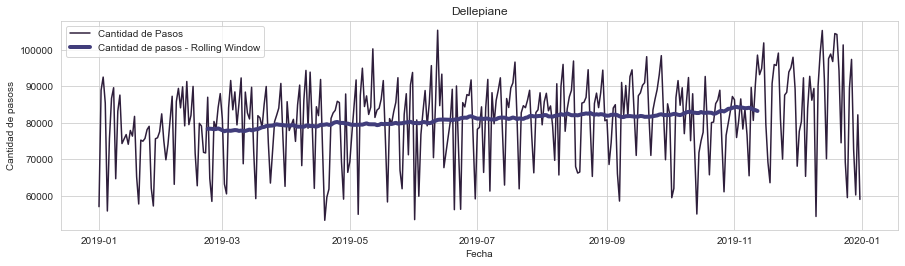

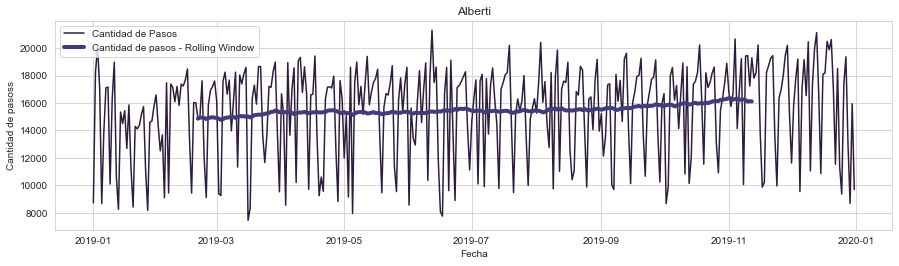

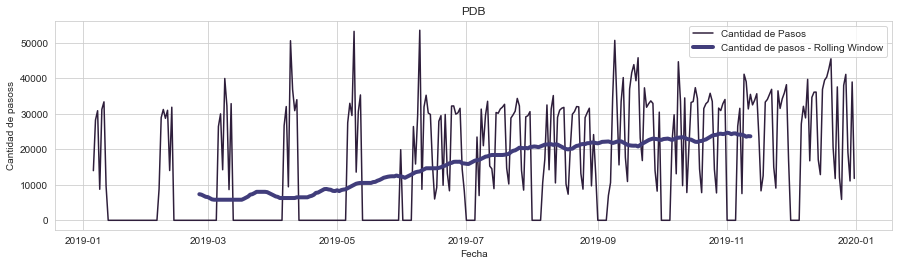

In [808]:
ventana=100
j=1
for i in estaciones:
    mask=df_total.estacion==i
    filtrado=df_total[mask]
    filtrado = filtrado.resample('D', on = 'fecha').sum()
    filtrado=remove_outliers(filtrado,'cantidad_pasos')
    filtrado = filtrado.interpolate(method='time')
    tend = filtrado.cantidad_pasos.rolling(window=ventana, center = True).mean()
    plt.figure(figsize = (15,50))
    plt.subplot(len(estaciones),1,j)
    plt.title(i)
    plt.plot(filtrado.index, filtrado.cantidad_pasos, label = 'Cantidad de Pasos')
    plt.plot(tend, lw = 4, label = 'Cantidad de pasos - Rolling Window')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de pasoss')
    plt.legend()
    j=j+1


Del grÃ¡fico anterior podemos observar como se diferencian las series temporales entre estaciones, lo que nos indica que posiblemente por razones demogrÃ¡ficas los comportamientos en la cantidad de pasos de vehÃ­culos de una estaciÃ³n a otra son muy diferentes, por lo que para mejorar aÃºn mÃ¡s la prediccion se podrÃ­a hacer una por cada estaciÃ³n.

### 3. Probar
Para continuar con este desarrollo me gustaria probar: 
1. Hacer la predicciÃ³n con redes neuronales y multi-step para poder comparar los resultados obtenidos con los dos modelos. 
2. Desarrollar un clustering de las series temporales https://pro.arcgis.com/es/pro-app/latest/tool-reference/space-time-pattern-mining/learnmoretimeseriesclustering.htm
3. Profundizar en el tema de la autocorrelaciÃ³n

## ConclusiÃ³n del Trabajo 

ElegÃ­ series de tiempo para el 3 entregable, ya que es un campo que me interesaba muchisimo ademÃ¡s de que es sumamente importante para mi trabajo actual. 
Pude rescatar la importancia de tener en claro los conceptos para manejar datos que se deben analizar conjuntamente con el paso del tiempo. 
Para este trabajo en particular, lo mÃ¡s importante fue adicionar la informaciÃ³n histÃ³rica que estaba disponible,  si bien fue complicado hacer las transformaciones de los datasets que tenian diferentes estructuras, ese trabajo se ve reflajado en la disminuciÃ³n abrupta del error al momento de validar el modelo de prophet. 
Para mejorar mÃ¡s aun la predicciÃ³n podriamos ver la forma de incorporar la informaciÃ³n de las otras varibles, o descomponer las series por tipo de vehÃ­culo y luego volver a unificarlas para predecir.
